In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bimbing/Zenius - Kampus Merdeka/Statistical Modeling I (Supervised Learning - Regression)/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
data = data[['TV','Sales']]
data.head(3)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3


Text(0, 0.5, 'Sales')

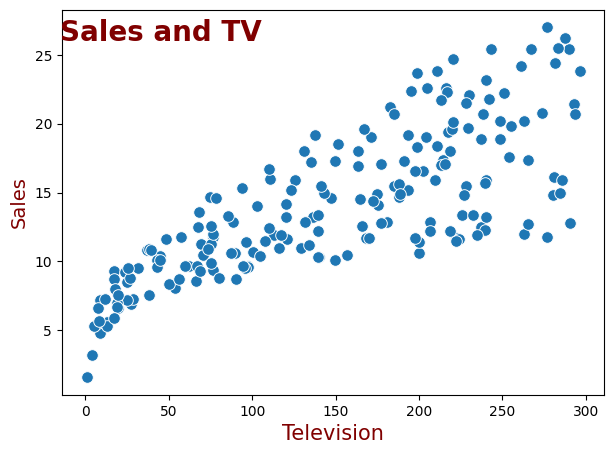

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(x='TV', y='Sales', data=data, s=70)

title = 'Sales and TV'
ax.text(45,26,title,horizontalalignment='center',color='#800000',fontsize=20,fontweight='bold')

ax.set_xlabel('Television', fontsize=15, color='#800000')
ax.set_ylabel('Sales', fontsize=14, color='#800000')


In [ ]:
data.columns = ['x','y']
data.head()

,x,y
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
data['(x-x_mean)'] = round(data['x'] - data['x'].mean(),2)
data['(y-y_mean)'] = round(data['y'] - data['y'].mean(),2)
data['(x-x_mean)(y-y_mean)'] = data['(x-x_mean)'] * data['(y-y_mean)']
data['pow((x-x_mean),2)'] = round(pow(data['x'] - data['x'].mean(),2),2)
data.head()

,x,y,(x-x_mean),(y-y_mean),(x-x_mean)(y-y_mean),"pow((x-x_mean),2)"
0,230.1,22.1,83.06,8.08,671.1248,6898.55
1,44.5,10.4,-102.54,-3.62,371.1948,10514.96
2,17.2,9.3,-129.84,-4.72,612.8448,16859.07
3,151.5,18.5,4.46,4.48,19.9808,19.87
4,180.8,12.9,33.76,-1.12,-37.8112,1139.57


In [ ]:
b1 = data['(x-x_mean)(y-y_mean)'].sum() / data['pow((x-x_mean),2)'].sum()
b1

0.047536644161412324

In [ ]:
b0 = data['y'].mean() - b1 * data['x'].mean()
b0

7.032593000895529

In [ ]:
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
textstr

'y = 7.032593000895529 + 0.047536644161412324 * x'

In [ ]:
data['y_pred'] = b0 + b1*data['x']
data.head()

,x,y,(x-x_mean),(y-y_mean),(x-x_mean)(y-y_mean),"pow((x-x_mean),2)",y_pred
0,230.1,22.1,83.06,8.08,671.1248,6898.55,17.970775
1,44.5,10.4,-102.54,-3.62,371.1948,10514.96,9.147974
2,17.2,9.3,-129.84,-4.72,612.8448,16859.07,7.850223
3,151.5,18.5,4.46,4.48,19.9808,19.87,14.234395
4,180.8,12.9,33.76,-1.12,-37.8112,1139.57,15.627218


In [ ]:
from sklearn.linear_model import LinearRegression

x = data.x.values.reshape(-1,1)
y = data.y.values.reshape(-1,1)

model = LinearRegression().fit(x, y)

b0 = float(model.intercept_[0])
b0 = round(b0,3)
b1 = float(model.coef_[0][0])
b1 = round(b1,3)
print('intercept (b0 ): ', b0)
print('slope (b1) : ', b1)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
print(textstr)

intercept (b0 ):  7.033
slope (b1) :  0.048
 
y = 7.033 + 0.048 * x


In [ ]:
y[0:3]

array([[22.1],
       [10.4],
       [ 9.3]])

In [ ]:
y_pred = model.predict(x)
y_pred[0:3]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376]])

In [ ]:
from sklearn.metrics import r2_score

print('R-squared for training data is {}'.format(r2_score(y_pred, y)))

R-squared for training data is 0.36567940037641455


In [ ]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_pred, y))))

RMSE for testing data is 3.2423221486546887


In [ ]:
from sklearn.metrics import mean_absolute_error

print('MAE for training data is {}'.format(mean_absolute_error(y_pred, y)))

MAE for training data is 2.549806038927486


In [ ]:
# dalam memprediksi itu error +- 2.5

# prediksi 15 -> 12.5 atau 17.5
# acceptable menurut atasan?
# deploy , re-modeling

In [ ]:
data.describe()

,x,y
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [ ]:
textstr

'y = 7.032593000895529 + 0.047536644161412324 * x'

Text(0, 0.5, 'Sales')

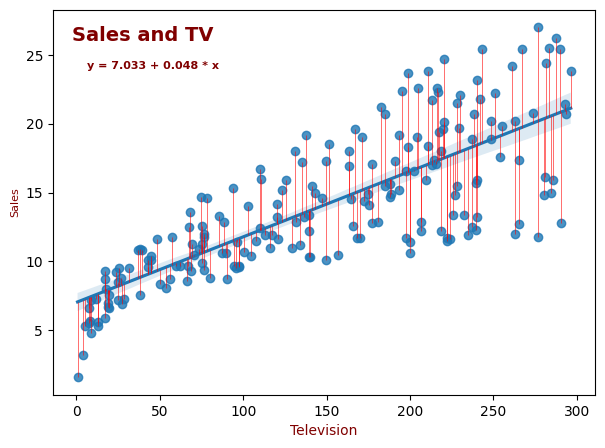

In [ ]:
fit = np.polyfit(data['x'], data['y'], deg=1)
y_hat = fit[1] + data['x'] * fit[0]

fig, ax = plt.subplots(figsize=(7,5))
sns.regplot(x='x', y='y', data=data)
plt.vlines(data['x'], y_hat, data['y'], lw = .4, colors='r');

title = 'Sales and TV'
ax.text(40,26,title,horizontalalignment='center',color='#800000',fontsize=14,fontweight='bold')
ax.text(46,24,textstr,horizontalalignment='center',color='#800000',fontsize=8,fontweight='bold')
ax.set_xlabel('Television', fontsize=10, color='#800000')
ax.set_ylabel('Sales', fontsize=8, color='#800000')


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bimbing/Zenius - Kampus Merdeka/Statistical Modeling I (Supervised Learning - Regression)/Advertising.csv')
data = data[['TV','Radio','Sales']]
data.head()

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9


In [ ]:
x = data[['TV','Radio']]
y = data['Sales']

model = LinearRegression().fit(x, y)

In [ ]:
b0 = round(float(model.intercept_),3)
b1 = round(float(model.coef_[0]),3)
b2 = round(float(model.coef_[1]),3)
print('intercept (b0 ) : ', b0)
print('slope (b1)      : ', b1)
print('slope (b2)      : ', b2)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * TV  + '+str(b2)+' * Radio'
print(textstr)

intercept (b0 ) :  2.921
slope (b1)      :  0.046
slope (b2)      :  0.188
 
y = 2.921 + 0.046 * TV  + 0.188 * Radio


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bimbing/Zenius - Kampus Merdeka/Statistical Modeling I (Supervised Learning - Regression)/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
x = data[['TV','Radio','Newspaper']]
y = data['Sales']

model = LinearRegression().fit(x, y)

In [ ]:
b0 = round(float(model.intercept_),3)
b1 = round(float(model.coef_[0]),3)
b2 = round(float(model.coef_[1]),3)
b3 = round(float(model.coef_[2]),3)
print('intercept (b0 ) : ', b0)
print('slope (b1)      : ', b1)
print('slope (b2)      : ', b2)
print('slope (b3)      : ', b3)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * TV  + '+str(b2)+' * Radio' 
print(textstr)

intercept (b0 ) :  2.939
slope (b1)      :  0.046
slope (b2)      :  0.189
slope (b3)      :  -0.001
 
y = 2.939 + 0.046 * TV  + 0.189 * Radio
